In [128]:
import cmath


def erdos(z, n):
    sdf = z ** n
    dsf = abs(z - 1) ** 2
    return float(abs(z ** n - 1) ** 2 - 1)


erdos(complex(-0.5, 0.5), 3)


def genus(x, y, z):
    comp = np.complex(x, y)
    res = erdos(comp, 3) ** 2 + (16 * abs(comp) ** 4 + 1) * z ** 2 - 0.12 ** 2
    return float(res)


TypeError: 'gudhi.simplex_tree.SimplexTree' object is not callable

In [129]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2,2)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = -0.5,2.5,-0.7,0.7,-0.5,0.5
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 1000) # resolution of the contour
    B = np.linspace(xmin, xmax, 30) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_27064\2763596200.py:20: UserWarning:

No contour levels were found within the data range.

C:\Users\Ivan\AppData\Local\Temp\ipykernel_27064\2763596200.py:26: UserWarning:

No contour levels were found within the data range.

C:\Users\Ivan\AppData\Local\Temp\ipykernel_27064\2763596200.py:31: UserWarning:

No contour levels were found within the data range.



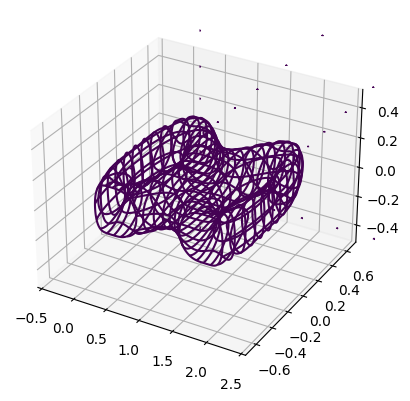

In [130]:
%matplotlib inline
def goursat_tangle(x,y,z):
    return (x*(x-1)**2*(x-2)+(y)**2)**2 +(z)**2 - 0.025
plot_implicit(goursat_tangle,)


In [131]:
import cmath
def erdos(z, n):
    return float(abs(z**n - 1)**2 - 1)


In [132]:
def genus(x,y,z):
    comp = np.complex(x,y)
    res = erdos(comp, 3)**2 + (16 * abs(comp)**4 + 1) * z**2 - 0.12**2
    return float(res)


In [ ]:
import math
import random
import numpy as np
import pandas as pd

x = [random.uniform(-0.5,2.5) for i in range(50000000)]
y = [random.uniform(-0.7,0.7) for i in range(50000000)]
z = [random.uniform(-0.5,0.5) for i in range(50000000)]




ls = []

for i in range(len(x)):
    number = goursat_tangle(x[i], y[i], z[i])

    if 0.000003 > number > -0.000003:
        ls.append((x[i], y[i], z[i]))
        #genus_points.loc[len(genus_points)] = [x[i], y[i], z[i]]




In [ ]:
len(ls)

In [154]:






%matplotlib inline
from gtda.plotting import plot_point_cloud
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
points = pd.DataFrame(data=ls)
points = points.to_numpy()


#fig = plt.figure()
#ax = plt.axes(projection='3d')
plot_point_cloud(points)
#ax.scatter(points[:,0], points[:,1], points[:,2], cmap='viridis', linewidth=0.5)
#plt.set_zlim(-0.7, 0.7)

In [ ]:
ls

In [155]:
import gudhi as gd
import gudhi.representations
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=False

In [156]:
cw = gd.RipsComplex(points=points).create_simplex_tree()
persist_diag = complex.persistence()

[1]

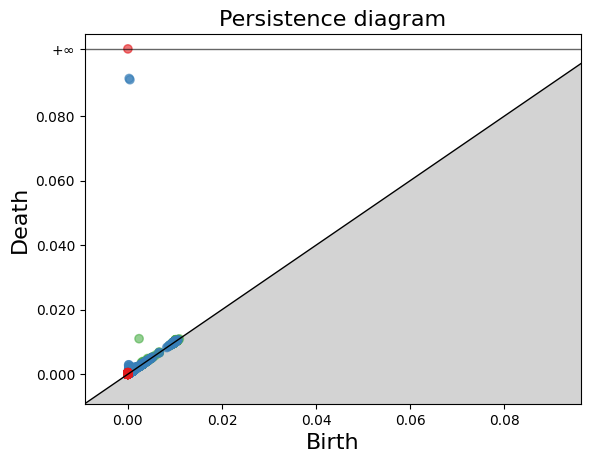

In [157]:
gd.plot_persistence_diagram(persist_diag)
cw.compute_persistence()
cw.betti_numbers()

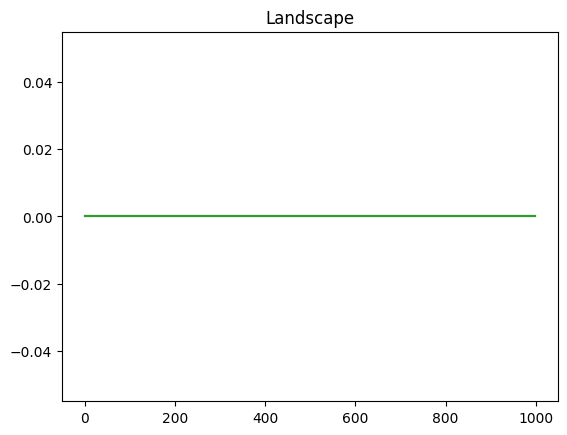

In [159]:
LS = gd.representations.Landscape(resolution=1500)
L = LS.fit_transform([cw.persistence_intervals_in_dimension(1)])
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.title("Landscape")
plt.show()